<a href="https://colab.research.google.com/github/SantiagoRodriguez8881/Metodos1_JuanPabloMartinez_SantiagoRodriguez/blob/La-ramita-del-snat/MarkovHidden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
# HIDDEN MARKOV

import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

# (a)
# Vamos a definir las matrices de transicion y emision:

T = np.array([[0.8, 0.2],
              [0.2, 0.8]])
E = np.array([[0.5, 0.9],
              [0.5, 0.1]])

Estados = np.array([0,1]) #Puede caer cara o sello
Prior = np.array([0.2, 0.8]) #Puede haber 2 tipos de monedas "J" & "B"
DictHidden = {0:'Justa',1:'Sesgada'}
DictObservado = {'S': 0, 'C': 1}
estados_ocultos = ['J', 'B']

# (b) Vamos a hallar la secuencia oculta mas probable

ObservadoSimbolo = ["S","C","C","C","S","C","S","C"]
Observado = [1, 0, 0, 0, 1, 0, 1, 0] # La serie de estados que nos dan

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))
    Permu = []
    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)
    CStates = np.array(Permu)
    return CStates

Ocultos = GetStates(Estados,8)
OcultosSimbolo = GetStates(estados_ocultos,8)


def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  # Probabilidad a priori
  p *= Prior[State[0]] #State[0] es el primer estado oculto en la cadena (0 o 1)

  for i in range(n-1): # El ultimo no va a ningun lado (se empezó con el prior)
    p *= T[State[i+1], State[i]] #La fila es el estado al que llego, la columna del que salgo.

  for i in range(n): #Para este NO hay prior, solo para los estados ocultos
    p *= E[ Obs[i], State[i] ]

  return p

# Acabamos de definir 2 funciones, Una nos da cada estado y la otra nos da la probabilidad de que ese estado ocurra.
# Hay que tener en cuenta que la probabilidad total no es 1, ya que ya hay un estado observado inicialmente.
# Hay 256 estados posibles totales, es decir 2^8 estados.

Prob_estados = np.zeros(Ocultos.shape[0])

for i in range(Prob_estados.shape[0]):
  Prob_estados[i] = GetProb(T, E, Observado, Ocultos[i], Prior)
  #Probabilidades de todos los estados ocultos posibles para lo observado

indice = np.where( Prob_estados == np.max(Prob_estados) )
print(Ocultos[indice],Prob_estados[indice], indice)
# Esta es la secuencia mas probable dado el estado inicial y lo observado.

print(f"La secuencia oculta más probable para {ObservadoSimbolo} es {OcultosSimbolo[indice]} con probabilidad {round(Prob_estados[indice][0],6)}")


[[1 1 1 1 0 0 0 0]] [0.0001911] (array([162]),)
La secuencia oculta más probable para ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C'] es [['B' 'B' 'B' 'B' 'J' 'J' 'J' 'J']] con probabilidad 0.000191


In [188]:
Obser = GetStates([0,1],8)

Nobs = Obser.shape[0]

PObs = np.zeros(Nobs)
for j in range(Nobs):

  dim = Ocultos.shape[0]
  Pr = np.zeros(dim)

  for i in range(dim):
    Pr[i] = GetProb(T,E,Obser[j],Ocultos[i],Prior)

  PObs[j] = np.sum(Pr)

#La probabilidad que vamos a usar en nuestro PRIMER dataframe

In [189]:
# (c) Vamos a ordenar un dataframe:

import pandas as pd

#Primero vamos a normalizar las probabilidades:

Pa = pd.DataFrame(OcultosSimbolo) #Estamos creando el DataFrame
Pa_single_column = Pa.apply(lambda row: row.tolist(), axis=1)
Pa = pd.DataFrame(Pa_single_column, columns=['Estados'])


Pa['Probabilidades'] = (PObs) #Columnas
suma = Pa['Probabilidades'].sum()
Pa['Probabilidades'] = Pa['Probabilidades'] * 100
Pa['Probabilidades'] = Pa['Probabilidades'] / suma

Pa # Este es el DataFrame que contiene a todos los 256 estados y sus probabilidades



,Estados,Probabilidades
0,"[J, J, J, J, J, J, J, J]",13.698241
1,"[J, J, J, J, J, J, J, B]",4.114921
2,"[J, J, J, J, J, J, B, J]",3.473730
3,"[J, J, J, J, J, B, J, J]",3.175272
4,"[J, J, J, J, B, J, J, J]",3.026766
...,...,...
251,"[B, B, B, B, J, B, B, B]",0.027216
252,"[B, B, B, B, B, J, B, B]",0.027387
253,"[B, B, B, B, B, B, J, B]",0.028489
254,"[B, B, B, B, B, B, B, J]",0.034573


In [190]:
# Siguiendo con el DataFrame de arriba

Pa_nuevo = Pa.copy() # Vamos a normalizar este DataFrame para despues nos ayude a filtrar
Pa_nuevo['Probabilidades'] = Prob_estados
suma = Pa_nuevo['Probabilidades'].sum()
Pa_nuevo['Probabilidades'] = Pa_nuevo['Probabilidades'] * 100
Pa_nuevo['Probabilidades'] = Pa_nuevo['Probabilidades'] / suma
Pa_sort = Pa_nuevo.sort_values(by= 'Probabilidades', ascending=[False]) #Estamos haciendo un nuevo DataFrame para este si filtrarlo
Pa_sort['Prob Acumulada'] = Pa_sort['Probabilidades'].cumsum()
Pa_20 = Pa_sort[Pa_sort['Prob Acumulada'] <= 20]
Pa_20

# En este dataframe hemos hallado las dos probabilidades mas grandes que sumen el 20%

,Estados,Probabilidades,Prob Acumulada
162,"[B, B, B, B, J, J, J, J]",9.878991,9.878991
0,"[J, J, J, J, J, J, J, J]",8.469643,18.348634


1.0


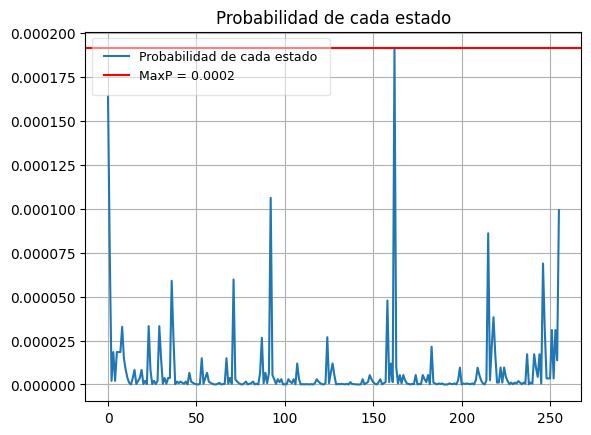

In [191]:
# (d) Vamos a dibujar las probabilidades ocultas asociadas al estado observable

print(np.sum(Prob_estados /np.sum(Prob_estados)))
a = Prob_estados[indice]

plt.plot(Prob_estados, label = 'Probabilidad de cada estado')
plt.grid(True)
plt.title('Probabilidad de cada estado')
plt.axhline(y=a, color='r', linestyle='-', label = 'MaxP = 0.0002')
plt.legend(loc='upper left', fontsize=9, frameon=True, framealpha=0.5, borderpad=1)
# Creamos la grafica :)

In [192]:
# (e) Vamos a calcular la probabilidad de cada estado observable como la suma de las probabilidades de los estados ocultos :

EstadosObservables= GetStates([0,1],8) #Todos los estados OBSERVABLES POSIBLES
NumeroObservables = EstadosObservables.shape[0]
ProbabilidadObservables = np.zeros(NumeroObservables)

for j in range(NumeroObservables):
  dim = Ocultos.shape[0] #Todos los estados observables de 3 tienen los mismos estados ocultos posibles
  P = np.zeros(dim)
  for i in range(dim):
    P[i] = GetProb(T,E,EstadosObservables[j],Ocultos[i],Prior)

  ProbabilidadObservables[j] = np.sum(P) #La suma de las probabilidades de todos los estados ocultos es la probabilidad del estado observable

ProbabilidadObservables

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

In [193]:
# (f) Vamos a mirar si las probabilidades estan bien definidas, es decir, si suman 1

print(ProbabilidadObservables.sum())

#En este caso la suma de las probabilidades de los estados ocultos si suman 1, estan bien definidas.

1.0000000000000007


In [196]:
# (g)
"""
Desde la elaboracion del codigo podemos pensar en que tan importante es la Prior para el proceso markov oculto, en si su importancia radica en que a partir de esta se construye la
distribucion de probabilidad de los estados ocultos al inicio del proceso. Tambien, la prior puede definir la precision de un modelo que se quiera ajustar a un comportamiento estocastico, ya que
en base a esta se construye el resto de probabilidades, por lo cual si desconocemos las matrices de transicion y emision la prior es fundamental para ajustar un buen modelo que describa estas matrices.
"""

# (h)
"""
En dado caso en el que las matrices de transmision y emision fueran conocidas y tuvieramos que usar alguna clase de algoritmo genético, lo que yo
haría sería hacer un muestreo de almenos 500 lanzamientos o "tiempos" donde se lanzan las monedas, en funcion de esto vamos a poder obtener ciertas
probabilidades, lo cual posteriormente nos puede ayudar a construir nuestras propias matrices de transmision y emision. En este paso podemos usar
un algoritmo de aprendizaje automatico que pueda estimar a futuro como se comportan las probabilidades en cada lanzamiento, es decir, teniendo
en cuenta probabilidades iniciales ya medidas, podriamos poner robots a entrenar para que se ajustaran a ciertas probabilidades mientras estamos probando
al mismo tiempo mas lanzamientos, de modo que mientras conseguimos mas probabilidades los robots pueden ajustarse a estas y terminar hallando
tanto la matriz de transicion como la de emision. La orden sería que el que tenga mas fitness es aquel que puede predecir en tu tiempo "t" de
mejor manera los lanzamientos en el tiempo "t+1".
"""


'\nEn dado caso en el que las matrices de transmision y emision fueran conocidas y tuvieramos que usar alguna clase de algoritmo genético, lo que yo\nharía sería hacer un muestreo de almenos 500 lanzamientos o "tiempos" donde se lanzan las monedas, en funcion de esto vamos a poder obtener ciertas\nprobabilidades, lo cual posteriormente nos puede ayudar a construir nuestras propias matrices de transmision y emision. En este paso podemos usar\nun algoritmo de aprendizaje automatico que pueda estimar a futuro como se comportan las probabilidades en cada lanzamiento, es decir, teniendo\nen cuenta probabilidades iniciales ya medidas, podriamos poner robots a entrenar para que se ajustaran a ciertas probabilidades mientras estamos probando\nal mismo tiempo mas lanzamientos, de modo que mientras conseguimos mas probabilidades los robots pueden ajustarse a estas y terminar hallando\ntanto la matriz de transicion como la de emision. La orden sería que el que tenga mas fitness es aquel que puede